In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv")
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df.info()
df.isna().sum()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107768 entries, 0 to 107767
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       107768 non-null  object 
 1   location_name                 107768 non-null  object 
 2   latitude                      107768 non-null  float64
 3   longitude                     107768 non-null  float64
 4   timezone                      107768 non-null  object 
 5   last_updated_epoch            107768 non-null  int64  
 6   last_updated                  107768 non-null  object 
 7   temperature_celsius           107768 non-null  float64
 8   temperature_fahrenheit        107768 non-null  float64
 9   condition_text                107768 non-null  object 
 10  wind_mph                      107768 non-null  float64
 11  wind_kph                      107768 non-null  float64
 12  wind_degree                   107768 non-nul

country                           211
location_name                     254
latitude                          394
longitude                         399
timezone                          197
last_updated_epoch               1068
last_updated                    18597
temperature_celsius               655
temperature_fahrenheit           1081
condition_text                     47
wind_mph                          180
wind_kph                          180
wind_degree                       360
wind_direction                     16
pressure_mb                        89
pressure_in                       207
precip_mm                         620
precip_in                          74
humidity                           99
cloud                             101
feels_like_celsius                769
feels_like_fahrenheit            1304
visibility_km                      70
visibility_miles                   13
uv_index                          163
gust_mph                          499
gust_kph    

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-weather-repository/state.db


In [8]:
df.isna().any().any()
# returns FALSE, no missing data

False

In [9]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [16]:
df.location_name.head(50)


0                   Kabul
1                  Tirana
2                 Algiers
3        Andorra La Vella
4                  Luanda
5            Saint John's
6            Buenos Aires
7                 Yerevan
8                Canberra
9                  Vienna
10                   Baku
11                 Nassau
12                 Manama
13                  Dhaka
14             Bridgetown
15                  Minsk
16               Brussels
17               Belmopan
18             Porto-Novo
19                Thimphu
20                  Sucre
21               Sarajevo
22               Gaborone
23                   Bras
24    Bandar Seri Begawan
25                  Sofia
26            Ouagadougou
27              Bujumbura
28                  Ivory
29                  Praia
30             Phnom Penh
31                Yaounde
32                 Ottawa
33                 Bangui
34              N'djamena
35               Santiago
36                Beijing
37                  Bogot
38          

In [22]:
"Manila" in df["location_name"].values

True

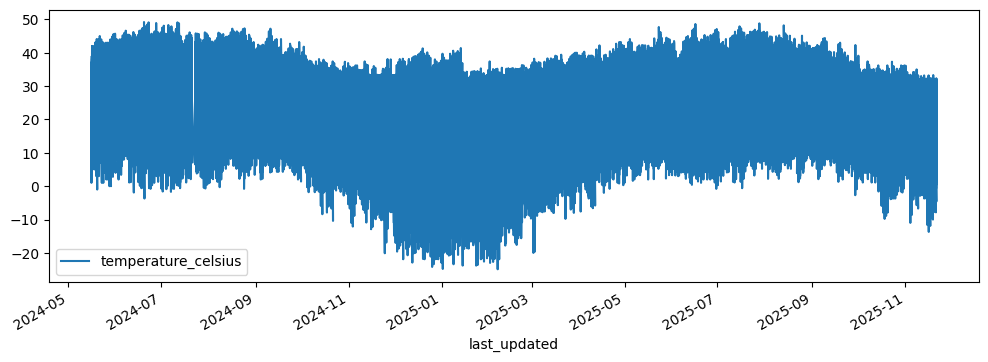

In [23]:
# Convert the last_updated column to datetime
df["last_updated"] = pd.to_datetime(df["last_updated"])

# Plot
df.plot(x="last_updated", y="temperature_celsius", figsize=(12,4))

# Sort
df = df.sort_values("last_updated")

In [24]:
df["temp_tomorrow"] = df["temperature_celsius"].shift(-1)
df = df.dropna()

In [25]:
# Show correlation between features
sns.heatmap(df.corr(numeric_only=True))

NameError: name 'sns' is not defined

In [ ]:
# # Features to use:
# temperature_celsius
# humidity
# pressure_mb
# wind_mph
# cloud
# visibility_km
# uv_index
# air_quality_PM2.5
# air_quality_PM10
# air_quality_Ozone

In [ ]:
# create new temp_tomorrow column
df["temp_tomorrow"] = df["temperature_celsius"].shift(-1)
df = df.dropna()

features = [
    "temperature_celsius",
    "humidity",
    "pressure_mb",
    "wind_mph",
    "cloud",
    "visibility_km",
    "uv_index",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "air_quality_Ozone"
]

X = df[features]
y = df["temp_tomorrow"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

In [ ]:
!pip install xgboost

In [10]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

NameError: name 'X_train' is not defined

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = {
    "Linear Regression": rmse(y_test, lr_preds),
    "Random Forest": rmse(y_test, rf_preds),
    "XGBoost": rmse(y_test, xgb_preds)
}

results

NameError: name 'y_test' is not defined

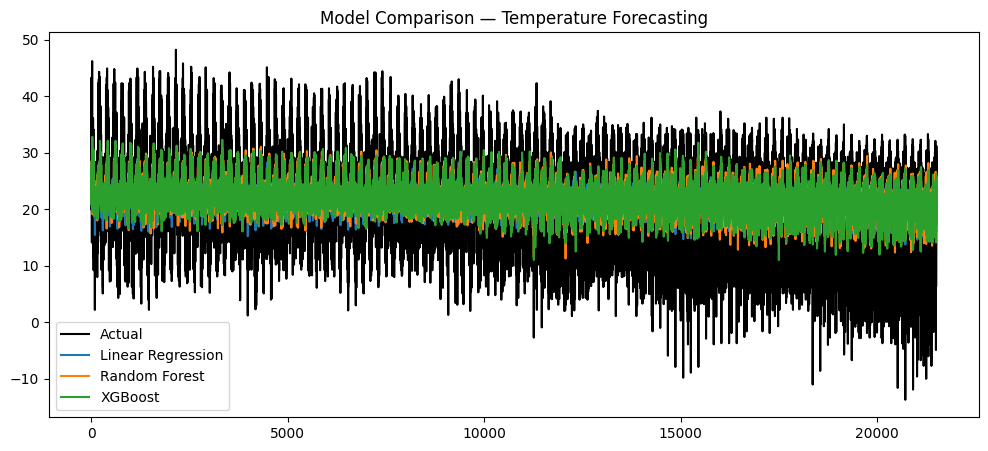

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", color="black")
plt.plot(lr_preds, label="Linear Regression")
plt.plot(rf_preds, label="Random Forest")
plt.plot(xgb_preds, label="XGBoost")

plt.title("Model Comparison — Temperature Forecasting")
plt.legend()
plt.show()

In [2]:
df.columns
df.location_name.head()

NameError: name 'df' is not defined

In [125]:
# Poor results, specify a location
city = "Washington Park"   # any city
df_city = df[df["location_name"] == city].copy()

In [126]:
df_city["last_updated"] = pd.to_datetime(df_city["last_updated"])
df_city = df_city.sort_values("last_updated")
df_city = df_city.reset_index(drop=True)

In [127]:
df_city["temp_tomorrow"] = df_city["temperature_celsius"].shift(-1)
df_city = df_city.dropna()

In [128]:
features = [
    "temperature_celsius",
    "humidity",
    "pressure_mb",
    "wind_mph",
    "cloud",
    "visibility_km",
    "uv_index",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "air_quality_Ozone"
]

X = df_city[features]
y = df_city["temp_tomorrow"]

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [130]:
# TRAIN MODELS AGAIN
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)



from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)



from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(a, b):
    return np.sqrt(mean_squared_error(a, b))

results = {
    "Linear Regression": rmse(y_test, lr_preds),
    "Random Forest": rmse(y_test, rf_preds),
    "XGBoost": rmse(y_test, xgb_preds)
}

results

{'Linear Regression': 5.270816067740648,
 'Random Forest': 5.6121643477954715,
 'XGBoost': 6.913035835478615}

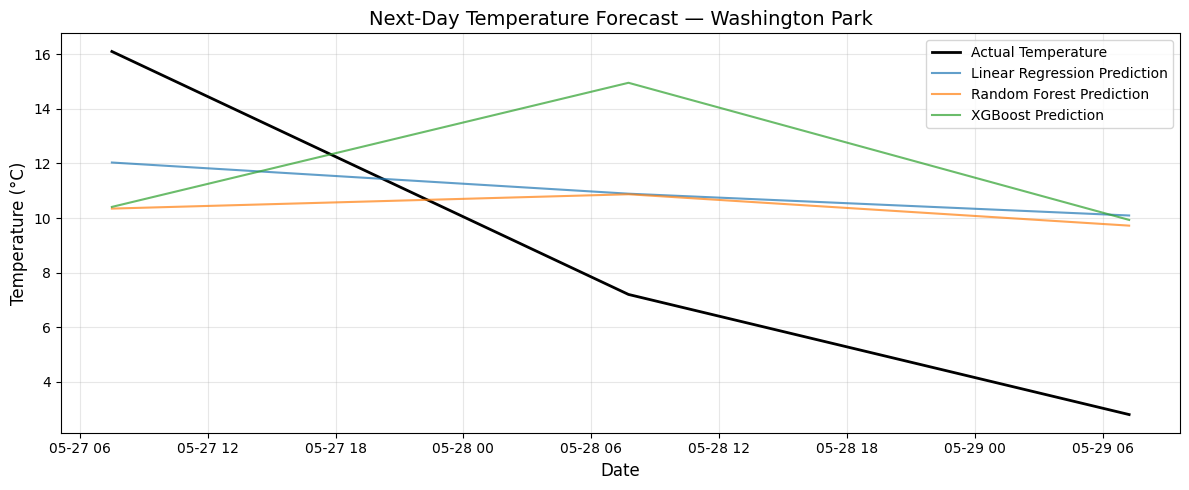

In [132]:
import matplotlib.pyplot as plt

# Align timestamps with predictions
test_dates = df_city["last_updated"].iloc[-len(y_test):]

plt.figure(figsize=(12,5))

plt.plot(test_dates, y_test.values, label="Actual Temperature", linewidth=2, color="black")
plt.plot(test_dates, lr_preds, label="Linear Regression Prediction", alpha=0.7)
plt.plot(test_dates, rf_preds, label="Random Forest Prediction", alpha=0.7)
plt.plot(test_dates, xgb_preds, label="XGBoost Prediction", alpha=0.7)

plt.title(f"Next-Day Temperature Forecast — {city}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

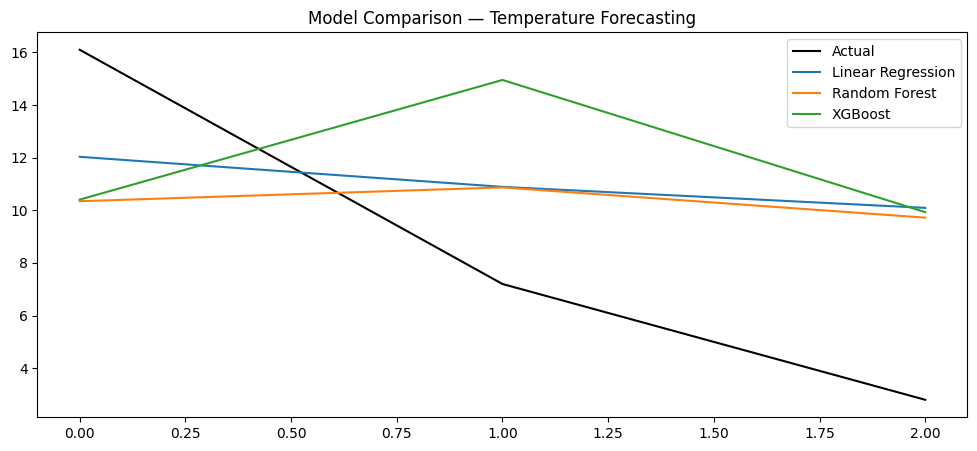

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", color="black")
plt.plot(lr_preds, label="Linear Regression")
plt.plot(rf_preds, label="Random Forest")
plt.plot(xgb_preds, label="XGBoost")

plt.title("Model Comparison — Temperature Forecasting")
plt.legend()
plt.show()